In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
df = pd.read_csv('rec_data.csv')

In [10]:
df

filename  number      name  chroma_stft      rmse    spec_cent  \
0       0_george_0.wav       0    george     0.198667  0.083719  1389.432001   
1       0_george_1.wav       0    george     0.273889  0.042972  1034.395917   
2      0_george_10.wav       0    george     0.342532  0.032147  1269.075083   
3      0_george_11.wav       0    george     0.255208  0.041286  1218.094283   
4      0_george_12.wav       0    george     0.222804  0.041336  1146.683549   
...                ...     ...       ...          ...       ...          ...   
2995  9_yweweler_5.wav       9  yweweler     0.374018  0.008558   985.559078   
2996  9_yweweler_6.wav       9  yweweler     0.408219  0.011599  1204.300650   
2997  9_yweweler_7.wav       9  yweweler     0.376584  0.008699  1070.728559   
2998  9_yweweler_8.wav       9  yweweler     0.352586  0.005564  1031.310462   
2999  9_yweweler_9.wav       9  yweweler     0.385950  0.006071   950.702118   

          spec_bw      rolloff       zcr       mfcc0  ...     mfcc10  \
0     1122.693199  2620.425180  0.060171 -312.483826  ... -24.018995   
1      974.723142  2113.980807  0.046744 -379.066345  ... -19.969303   
2     1003.382474  2388.227983  0.076956 -424.772461  ... -23.223995   
3     1049.359689  2413.872070  0.062061 -389.584808  ... -23.147619   
4      994.639615  2244.836426  0.061479 -389.274689  ... -21.835735   
...           ...          ...       ...         ...  ...        ...   
2995   884.080353  1823.593140  0.058289 -539.953735  ...  10.374135   
2996   911.623800  2174.853516  0.071094 -491.344299  ...  11.993781   
2997   908.047852  1971.633911  0.052460 -511.855133  ...   6.611096   
2998   940.535710  1887.145996  0.056478 -559.762512  ...   7.000213   
2999   836.553770  1715.856291  0.052914 -553.986816  ...   5.865633   

         mfcc11    mfcc12     mfcc13     mfcc14    mfcc15     mfcc16  \
0    -43.016975  2.110411  -6.013774 -28.540850 -3.117069  -5.603108   
1    -40.412582 -2.325323  -6.705203 -25.866652 -7.142958 -10.470287   
2    -34.547401 -1.589133 -11.633971 -23.948620 -0.723396  -4.458993   
3    -41.559254 -0.668476 -12.243627 -26.992029  1.255178  -5.872051   
4    -41.768703 -1.458749 -10.668156 -28.250916 -1.996623  -7.960970   
...         ...       ...        ...        ...       ...        ...   
2995 -23.454926  2.178336   0.333495 -16.196772 -3.123700  -9.697893   
2996 -14.578753  5.613831   0.955333 -12.609158 -2.106348 -12.828856   
2997 -17.942572  2.736619  -5.966835 -16.471325 -2.094696 -15.326060   
2998 -17.065546  7.002769  -3.895181 -14.850399  1.386613 -11.851810   
2999 -18.515541  4.906856  -5.223548 -13.368548  1.882477 -13.833864   

         mfcc17    mfcc18     mfcc19  
0    -13.659479 -2.320226 -12.169437  
1    -16.260077 -5.955035 -14.368776  
2    -10.715401 -1.525208 -11.829735  
3    -13.653750 -2.406699 -15.252200  
4    -16.239616 -3.517600 -17.073278  
...         ...       ...        ...  
2995 -11.340939  1.610538  -8.898899  
2996 -10.495636  5.215742  -9.894784  
2997 -16.683109 -1.763444 -13.693180  
2998 -10.300099  6.005344  -9.889004  
2999  -9.865933  7.134007 -10.600046  

[3000 rows x 29 columns]

In [11]:
df_george = df.loc[df['name'] == 'george']

In [12]:
df_george0 = df.loc[((df['name'] == 'george') & (df['number'] == 0))]

In [13]:
df_george

filename  number    name  chroma_stft      rmse    spec_cent  \
0      0_george_0.wav       0  george     0.198667  0.083719  1389.432001   
1      0_george_1.wav       0  george     0.273889  0.042972  1034.395917   
2     0_george_10.wav       0  george     0.342532  0.032147  1269.075083   
3     0_george_11.wav       0  george     0.255208  0.041286  1218.094283   
4     0_george_12.wav       0  george     0.222804  0.041336  1146.683549   
...               ...     ...     ...          ...       ...          ...   
2745   9_george_5.wav       9  george     0.297088  0.039306  1289.305145   
2746   9_george_6.wav       9  george     0.297963  0.043722  1219.594536   
2747   9_george_7.wav       9  george     0.279576  0.040310  1253.576456   
2748   9_george_8.wav       9  george     0.292679  0.048362  1197.827977   
2749   9_george_9.wav       9  george     0.310658  0.042664  1141.017082   

          spec_bw      rolloff       zcr       mfcc0  ...     mfcc10  \
0     1122.693199  2620.425180  0.060171 -312.483826  ... -24.018995   
1      974.723142  2113.980807  0.046744 -379.066345  ... -19.969303   
2     1003.382474  2388.227983  0.076956 -424.772461  ... -23.223995   
3     1049.359689  2413.872070  0.062061 -389.584808  ... -23.147619   
4      994.639615  2244.836426  0.061479 -389.274689  ... -21.835735   
...           ...          ...       ...         ...  ...        ...   
2745  1038.458624  2517.141724  0.068136 -381.816254  ... -16.786173   
2746  1010.493774  2465.982422  0.063457 -390.190948  ... -16.545250   
2747  1000.672061  2461.706543  0.071830 -386.731171  ... -15.872583   
2748  1015.071600  2400.952148  0.065186 -381.196930  ... -14.196335   
2749   967.025162  2165.491253  0.057490 -379.448029  ... -17.176241   

         mfcc11    mfcc12     mfcc13     mfcc14    mfcc15     mfcc16  \
0    -43.016975  2.110411  -6.013774 -28.540850 -3.117069  -5.603108   
1    -40.412582 -2.325323  -6.705203 -25.866652 -7.142958 -10.470287   
2    -34.547401 -1.589133 -11.633971 -23.948620 -0.723396  -4.458993   
3    -41.559254 -0.668476 -12.243627 -26.992029  1.255178  -5.872051   
4    -41.768703 -1.458749 -10.668156 -28.250916 -1.996623  -7.960970   
...         ...       ...        ...        ...       ...        ...   
2745 -39.569080  0.540947 -10.635013 -22.827408 -1.018543 -16.622879   
2746 -41.418507  0.146189 -10.623314 -23.240026 -1.935475 -18.008862   
2747 -40.025181  1.005774  -9.013006 -23.176218 -4.363078 -19.275560   
2748 -40.684353 -1.264203 -10.474943 -25.543585 -5.068680 -16.767191   
2749 -41.155834 -1.912667 -10.374963 -24.908060 -2.704899 -15.124725   

         mfcc17    mfcc18     mfcc19  
0    -13.659479 -2.320226 -12.169437  
1    -16.260077 -5.955035 -14.368776  
2    -10.715401 -1.525208 -11.829735  
3    -13.653750 -2.406699 -15.252200  
4    -16.239616 -3.517600 -17.073278  
...         ...       ...        ...  
2745 -19.675772 -5.476321 -20.707390  
2746 -19.379761 -5.312943 -21.215343  
2747 -18.962534 -4.697541 -21.290894  
2748 -19.236633 -5.458241 -16.348511  
2749 -19.845894 -4.402289 -19.331516  

[500 rows x 29 columns]

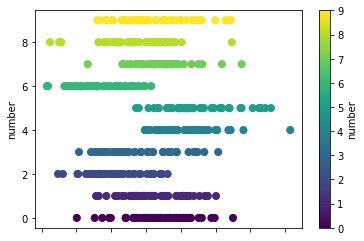

In [14]:
df_george.plot.scatter(x="mfcc0", y="number", c="number", cmap="viridis", s=50);

In [15]:
df_george0['mfcc0'].max()

-312.4838256835937

In [16]:
df_george0['mfcc0'].min()

-424.7724609375

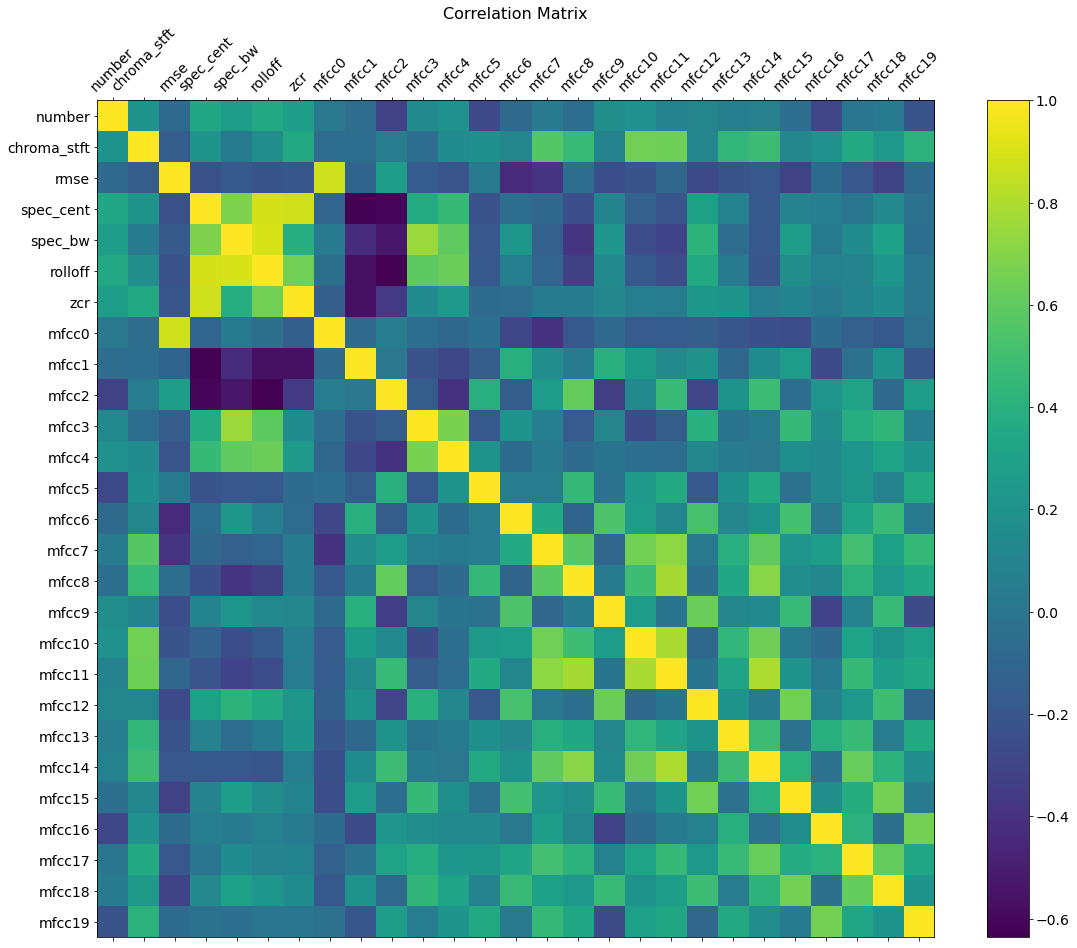

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

/var/folders/pj/d6ls7fkj2jn56gpqd1lmrk6h0000gp/T/ipykernel_2159/3314849639.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


<AxesSubplot:>

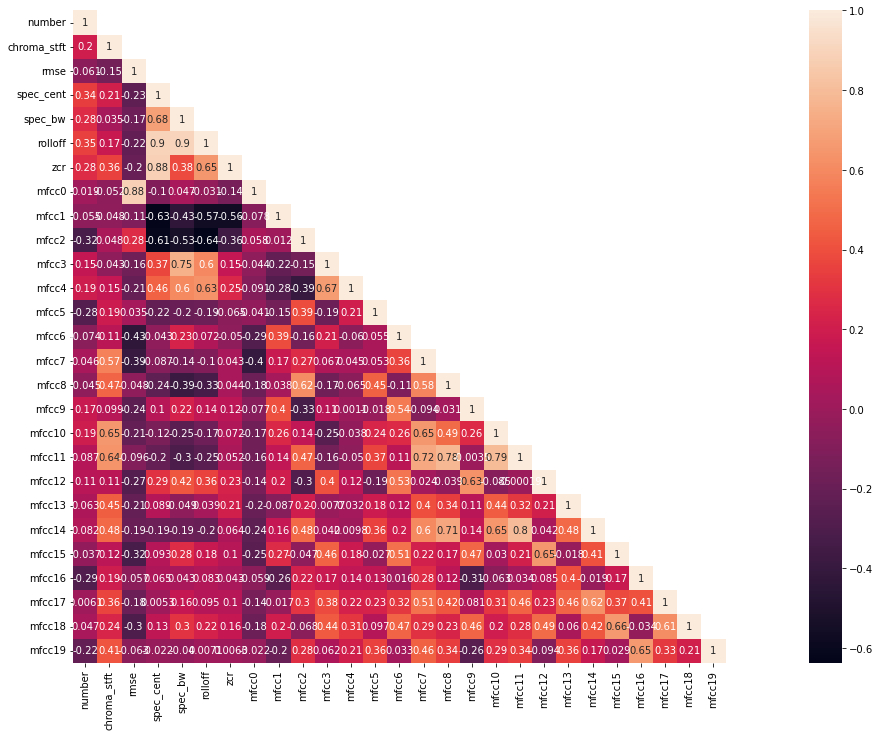

In [19]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [20]:
#Pruebas
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [22]:
df = df.drop(['filename', 'number', 'chroma_stft', 'rmse', 'spec_cent', 'spec_bw', 'rolloff', 'zcr'],axis=1)



In [52]:
df.to_csv('to_train.csv', index=False)

In [23]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('name',axis=1))
X=scaled_df
Y=df['name']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

#### LOGISTIC REGRESSSION

In [25]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.9933333333333333


#### kNN

In [26]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.9933333333333333


#### Support Vector Machine (SVM)

In [27]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

0.9983333333333333


#### DECISION TREE

In [28]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))

0.9483333333333334


#### RANDOM FOREST

In [29]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.99


#### GRADIENT BOOSTING

In [30]:
clf_gb=GradientBoostingClassifier()
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
print(accuracy_score(pred,y_test))

0.985


#### CNN 

In [31]:
# Set seed to get same results
np.random.seed(123)
# Define model as Sequential class
model_cnn = Sequential()

NameError: name 'Sequential' is not defined

### k-means

In [32]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
acc_frame=pd.DataFrame(d)
acc_frame

Modelling Algo  Accuracy
0          LogisticRegression  0.993333
1                   LinearSVM  0.998333
2                      rbfSVM  0.998333
3           KNearestNeighbors  0.993333
4      RandomForestClassifier  0.991667
5                DecisionTree  0.941667
6  GradientBoostingClassifier  0.986667
7                  GaussianNB  0.965000

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

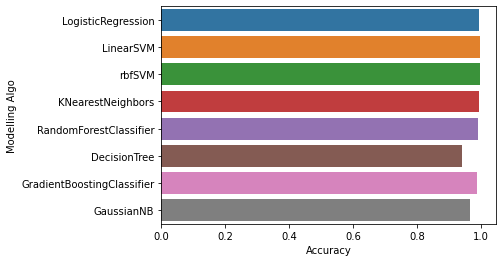

In [34]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

In [35]:
## primer modelo . revisar y borrar

In [36]:
df.shape

(3000, 21)

In [37]:
df

name       mfcc0       mfcc1      mfcc2      mfcc3      mfcc4  \
0       george -312.483826  157.413849 -83.389450  47.328335  47.099693   
1       george -379.066345  165.666901 -57.867474  22.860203  25.974346   
2       george -424.772461  127.852097 -53.795578  17.831009  26.846817   
3       george -389.584808  166.073517 -79.408005  25.375334  32.479534   
4       george -389.274689  169.632339 -77.210121  22.742558  36.415375   
...        ...         ...         ...        ...        ...        ...   
2995  yweweler -539.953735  227.801041 -66.478615   1.908442  16.775307   
2996  yweweler -491.344299  227.619583 -87.590607   2.129326  22.445152   
2997  yweweler -511.855133  214.749985 -75.395142   1.426343  20.796366   
2998  yweweler -559.762512  231.914139 -70.128494   8.296725  18.100630   
2999  yweweler -553.986816  235.320465 -67.915489  10.012416  20.706699   

          mfcc5      mfcc6      mfcc7      mfcc8  ...     mfcc10     mfcc11  \
0    -55.105373 -13.754276 -17.003675 -52.974422  ... -24.018995 -43.016975   
1    -46.115276 -14.100521 -26.140167 -52.515862  ... -19.969303 -40.412582   
2    -34.200123 -14.209099 -18.696369 -32.358147  ... -23.223995 -34.547401   
3    -50.722202 -10.692026 -17.150023 -45.109356  ... -23.147619 -41.559254   
4    -46.292343 -13.345025 -17.793606 -43.902256  ... -21.835735 -41.768703   
...         ...        ...        ...        ...  ...        ...        ...   
2995 -36.352470  18.748755   1.454089 -40.820858  ...  10.374135 -23.454926   
2996 -49.015450  13.958400  14.732166 -36.356777  ...  11.993781 -14.578753   
2997 -40.226170  10.569022   4.748950 -33.262833  ...   6.611096 -17.942572   
2998 -42.547340  19.210257   9.212729 -33.308395  ...   7.000213 -17.065546   
2999 -41.679661  18.537888   8.392156 -34.662086  ...   5.865633 -18.515541   

        mfcc12     mfcc13     mfcc14    mfcc15     mfcc16     mfcc17  \
0     2.110411  -6.013774 -28.540850 -3.117069  -5.603108 -13.659479   
1    -2.325323  -6.705203 -25.866652 -7.142958 -10.470287 -16.260077   
2    -1.589133 -11.633971 -23.948620 -0.723396  -4.458993 -10.715401   
3    -0.668476 -12.243627 -26.992029  1.255178  -5.872051 -13.653750   
4    -1.458749 -10.668156 -28.250916 -1.996623  -7.960970 -16.239616   
...        ...        ...        ...       ...        ...        ...   
2995  2.178336   0.333495 -16.196772 -3.123700  -9.697893 -11.340939   
2996  5.613831   0.955333 -12.609158 -2.106348 -12.828856 -10.495636   
2997  2.736619  -5.966835 -16.471325 -2.094696 -15.326060 -16.683109   
2998  7.002769  -3.895181 -14.850399  1.386613 -11.851810 -10.300099   
2999  4.906856  -5.223548 -13.368548  1.882477 -13.833864  -9.865933   

        mfcc18     mfcc19  
0    -2.320226 -12.169437  
1    -5.955035 -14.368776  
2    -1.525208 -11.829735  
3    -2.406699 -15.252200  
4    -3.517600 -17.073278  
...        ...        ...  
2995  1.610538  -8.898899  
2996  5.215742  -9.894784  
2997 -1.763444 -13.693180  
2998  6.005344  -9.889004  
2999  7.134007 -10.600046  

[3000 rows x 21 columns]

In [38]:
df

name       mfcc0       mfcc1      mfcc2      mfcc3      mfcc4  \
0       george -312.483826  157.413849 -83.389450  47.328335  47.099693   
1       george -379.066345  165.666901 -57.867474  22.860203  25.974346   
2       george -424.772461  127.852097 -53.795578  17.831009  26.846817   
3       george -389.584808  166.073517 -79.408005  25.375334  32.479534   
4       george -389.274689  169.632339 -77.210121  22.742558  36.415375   
...        ...         ...         ...        ...        ...        ...   
2995  yweweler -539.953735  227.801041 -66.478615   1.908442  16.775307   
2996  yweweler -491.344299  227.619583 -87.590607   2.129326  22.445152   
2997  yweweler -511.855133  214.749985 -75.395142   1.426343  20.796366   
2998  yweweler -559.762512  231.914139 -70.128494   8.296725  18.100630   
2999  yweweler -553.986816  235.320465 -67.915489  10.012416  20.706699   

          mfcc5      mfcc6      mfcc7      mfcc8  ...     mfcc10     mfcc11  \
0    -55.105373 -13.754276 -17.003675 -52.974422  ... -24.018995 -43.016975   
1    -46.115276 -14.100521 -26.140167 -52.515862  ... -19.969303 -40.412582   
2    -34.200123 -14.209099 -18.696369 -32.358147  ... -23.223995 -34.547401   
3    -50.722202 -10.692026 -17.150023 -45.109356  ... -23.147619 -41.559254   
4    -46.292343 -13.345025 -17.793606 -43.902256  ... -21.835735 -41.768703   
...         ...        ...        ...        ...  ...        ...        ...   
2995 -36.352470  18.748755   1.454089 -40.820858  ...  10.374135 -23.454926   
2996 -49.015450  13.958400  14.732166 -36.356777  ...  11.993781 -14.578753   
2997 -40.226170  10.569022   4.748950 -33.262833  ...   6.611096 -17.942572   
2998 -42.547340  19.210257   9.212729 -33.308395  ...   7.000213 -17.065546   
2999 -41.679661  18.537888   8.392156 -34.662086  ...   5.865633 -18.515541   

        mfcc12     mfcc13     mfcc14    mfcc15     mfcc16     mfcc17  \
0     2.110411  -6.013774 -28.540850 -3.117069  -5.603108 -13.659479   
1    -2.325323  -6.705203 -25.866652 -7.142958 -10.470287 -16.260077   
2    -1.589133 -11.633971 -23.948620 -0.723396  -4.458993 -10.715401   
3    -0.668476 -12.243627 -26.992029  1.255178  -5.872051 -13.653750   
4    -1.458749 -10.668156 -28.250916 -1.996623  -7.960970 -16.239616   
...        ...        ...        ...       ...        ...        ...   
2995  2.178336   0.333495 -16.196772 -3.123700  -9.697893 -11.340939   
2996  5.613831   0.955333 -12.609158 -2.106348 -12.828856 -10.495636   
2997  2.736619  -5.966835 -16.471325 -2.094696 -15.326060 -16.683109   
2998  7.002769  -3.895181 -14.850399  1.386613 -11.851810 -10.300099   
2999  4.906856  -5.223548 -13.368548  1.882477 -13.833864  -9.865933   

        mfcc18     mfcc19  
0    -2.320226 -12.169437  
1    -5.955035 -14.368776  
2    -1.525208 -11.829735  
3    -2.406699 -15.252200  
4    -3.517600 -17.073278  
...        ...        ...  
2995  1.610538  -8.898899  
2996  5.215742  -9.894784  
2997 -1.763444 -13.693180  
2998  6.005344  -9.889004  
2999  7.134007 -10.600046  

[3000 rows x 21 columns]

In [39]:
df.columns

Index(['name', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
       'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19'],
      dtype='object')

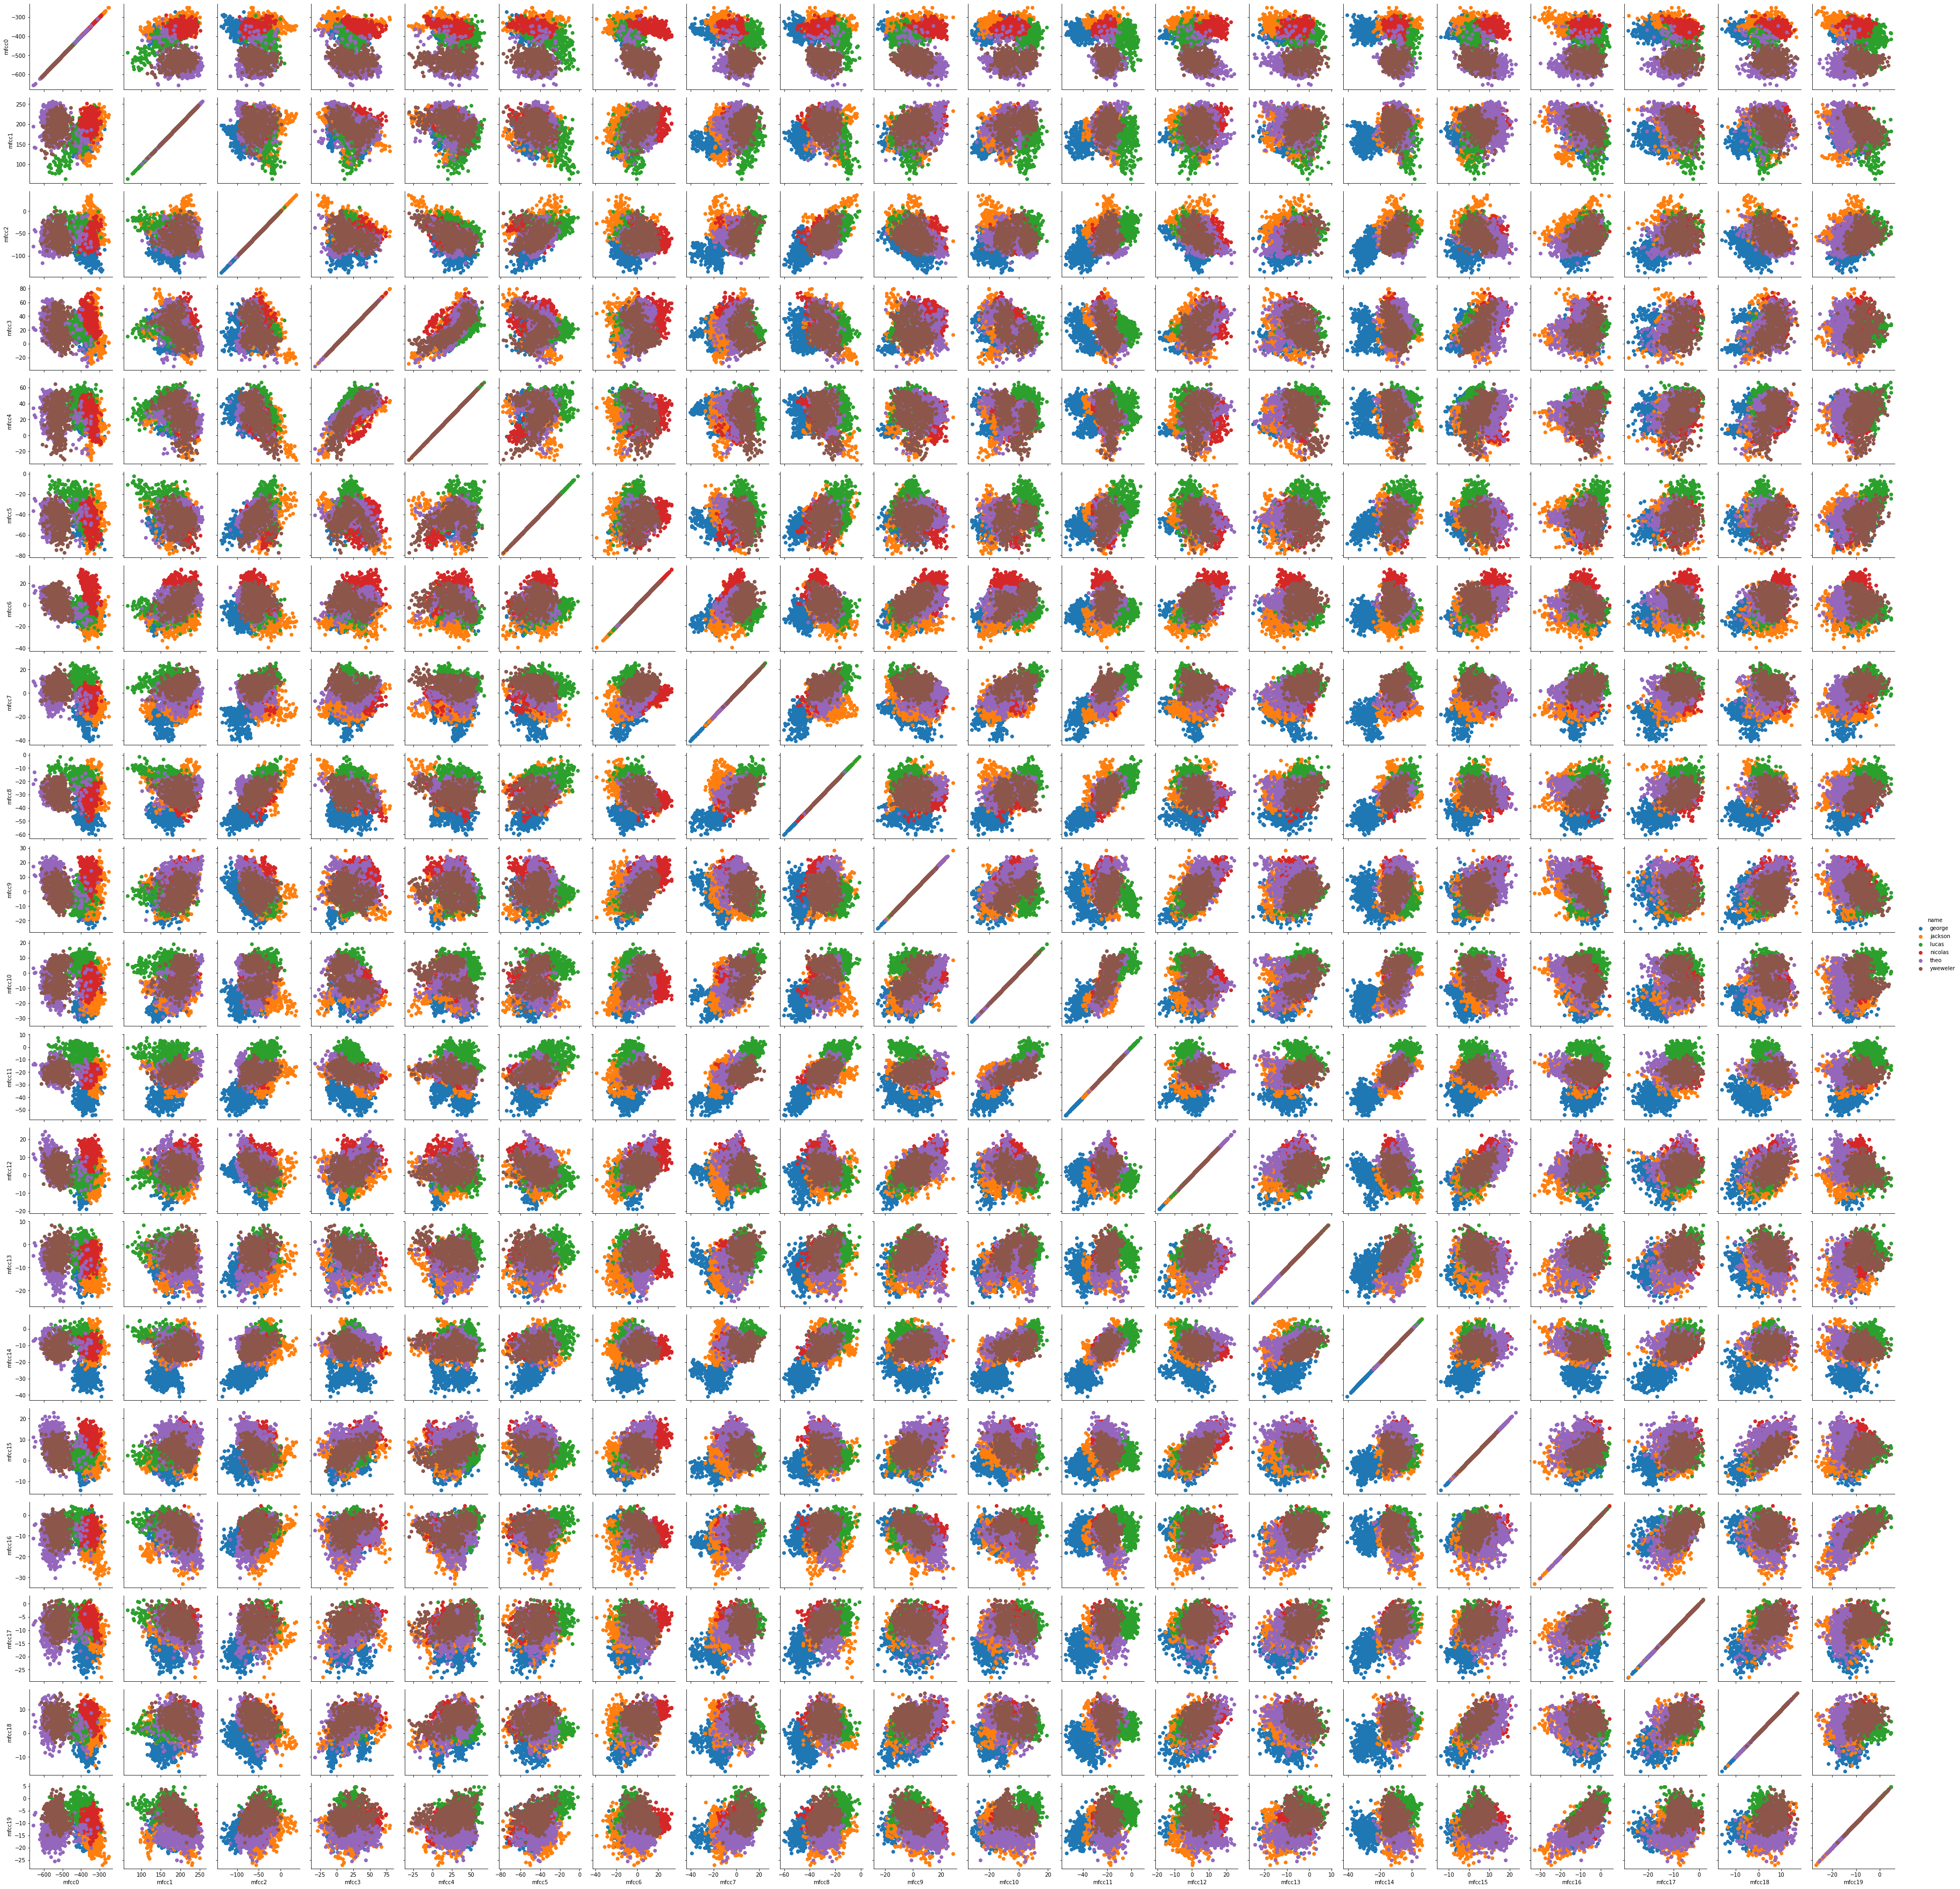

In [40]:
g = sns.PairGrid(df[['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
       'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'name']], hue = "name")
g = g.map(plt.scatter).add_legend()

In [41]:
speaker_name = df.iloc[:, 0]
encoder = LabelEncoder()
y = encoder.fit_transform(speaker_name)

In [42]:
speaker_name

0         george
1         george
2         george
3         george
4         george
          ...   
2995    yweweler
2996    yweweler
2997    yweweler
2998    yweweler
2999    yweweler
Name: name, Length: 3000, dtype: object

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.loc[ : , df.columns != 'name'], dtype=float))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
len(y_train)

2400

In [46]:
len(y_test)

600

In [47]:
X_train[10]

array([ 0.07482835, -1.76368941,  0.34627304,  0.74440371,  1.0792272 ,
        0.22466253, -0.85935211,  1.6365898 ,  1.92737408, -0.676749  ,
        0.74633944,  1.4997507 ,  0.02548482,  0.92933082,  0.98548419,
       -0.29988997,  0.53176728,  1.02199785, -0.26642898,  0.24095158])

In [48]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

ModuleNotFoundError: No module named 'keras'

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
19/19 [==============================] - 0s 1ms/step - loss: 1.5159 - accuracy: 0.7096
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.9679
Epoch 3/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9842
Epoch 4/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9892
Epoch 5/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0273 - accuracy: 0.9946
Epoch 6/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9962
Epoch 7/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9958
Epoch 8/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9983
Epoch 9/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9971
Epoch 10/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.9975
Epoch 11/20
19/19 [

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

19/19 [==============================] - 0s 695us/step - loss: 0.0047 - accuracy: 1.0000


In [ ]:
print('test_acc: ',test_acc)

test_acc:  1.0


In [ ]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30
5/5 [==============================] - 0s 31ms/step - loss: 2.1160 - accuracy: 0.4859 - val_loss: 1.6875 - val_accuracy: 0.6950
Epoch 2/30
5/5 [==============================] - 0s 8ms/step - loss: 1.3697 - accuracy: 0.7627 - val_loss: 0.9601 - val_accuracy: 0.7450
Epoch 3/30
5/5 [==============================] - 0s 8ms/step - loss: 0.7281 - accuracy: 0.7959 - val_loss: 0.4707 - val_accuracy: 0.8750
Epoch 4/30
5/5 [==============================] - 0s 8ms/step - loss: 0.3466 - accuracy: 0.9168 - val_loss: 0.2232 - val_accuracy: 0.9550
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 0.1571 - accuracy: 0.9641 - val_loss: 0.1006 - val_accuracy: 0.9700
Epoch 6/30
5/5 [==============================] - 0s 9ms/step - loss: 0.0727 - accuracy: 0.9773 - val_loss: 0.0655 - val_accuracy: 0.9800
Epoch 7/30
5/5 [==============================] - 0s 8ms/step - loss: 0.0425 - accuracy: 0.9886 - val_loss: 0.0643 - val_accuracy: 0.9850
Epoch 8/30
5/5 [================

In [ ]:
results

[0.007238945923745632, 0.996666669845581]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0].shape

(10,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

5